In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv("Loan_pred.csv", index_col=0)

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [21]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
count = 0
for i in df.columns:
    count +=1
print(count)
len(df.columns)

12


12

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [31]:
#label encode the target variable
encode = LabelEncoder()
df.Loan_Status = encode.fit_transform(df.Loan_Status)


In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [57]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

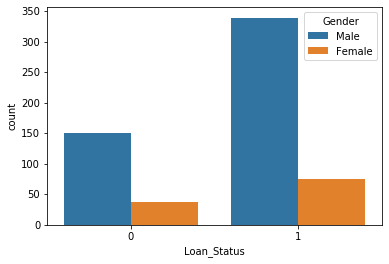

In [46]:
import seaborn as sns
sns.countplot('Loan_Status',hue='Gender',data=df)

In [47]:
df['Gender'] = df['Gender'].fillna('Male')

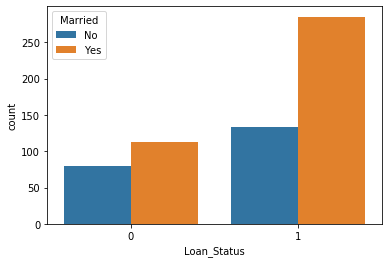

In [49]:
sns.countplot('Loan_Status', hue='Married',data= df)

In [50]:
df['Married'] = df['Married'].fillna('Yes')

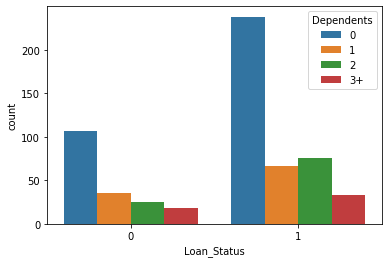

In [51]:
sns.countplot('Loan_Status', hue='Dependents',data= df)

In [52]:
df['Dependents'] = df['Dependents'].fillna(0)

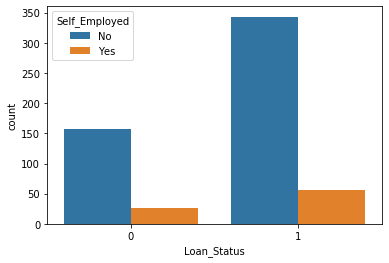

In [54]:
sns.countplot('Loan_Status', hue='Self_Employed',data= df)

In [56]:
df['Self_Employed'] = df['Self_Employed'].fillna('Yes')

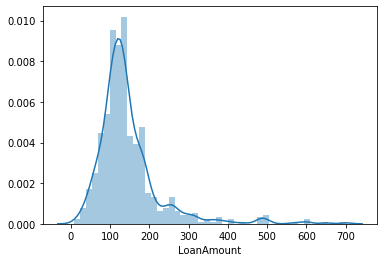

In [71]:
sns.distplot(df['LoanAmount'])

In [63]:
import numpy as np

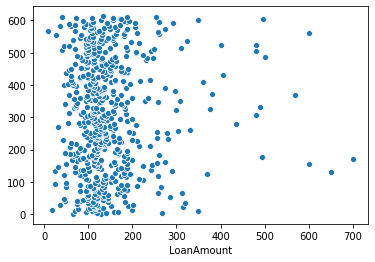

In [64]:
sns.scatterplot(df['LoanAmount'],y=np.arange(0,614))

In [70]:
mean=df[df['LoanAmount']<=400]['LoanAmount'].mean()
df['LoanAmount'].fillna(mean,inplace=True)

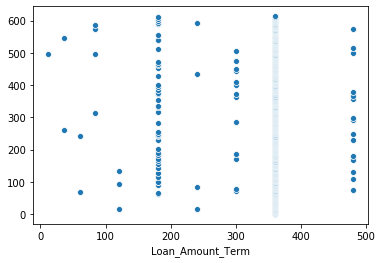

In [72]:
sns.scatterplot(df['Loan_Amount_Term'],y=np.arange(0,614))

In [76]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)

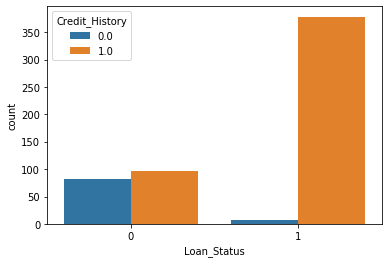

In [77]:
sns.countplot('Loan_Status',hue='Credit_History',data=df)

In [78]:
df['Credit_History'] = df['Credit_History'].fillna(1.0)

In [80]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [82]:
df1 = df.copy()

In [83]:
print(df1['Gender'].unique())
print(df1['Married'].unique())
print(df1['Education'].unique())
print(df1['Self_Employed'].unique())
print(df1['Property_Area'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


In [87]:
df1['Gender'] = encode.fit_transform(df1['Gender'])
df1['Married'] = encode.fit_transform(df1['Married'])
df1['Education'] = encode.fit_transform(df1['Education'])
df1['Self_Employed'] = encode.fit_transform(df1['Self_Employed'])
df1['Property_Area'] = encode.fit_transform(df1['Property_Area'])


In [94]:
print(df['Gender'].unique())
print(df['Married'].unique())
print(df['Education'].unique())
print(df['Self_Employed'].unique())
print(df['Property_Area'].unique())
print(df['Loan_Status'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]


In [105]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
std = StandardScaler()

In [106]:
unscaled_features = df1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
scaled_features = std.fit_transform(unscaled_features)


In [119]:
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0,0,0,0.072991,-0.554487,-0.105907,0.273231,1.0,2,1
LP001003,1,1,1,0,0,-0.134412,-0.038732,-0.215292,0.273231,1.0,0,0
LP001005,1,1,0,0,1,-0.393747,-0.554487,-0.953506,0.273231,1.0,2,1
LP001006,1,1,0,1,0,-0.462062,0.251980,-0.310545,0.273231,1.0,2,1
LP001008,1,0,0,0,0,0.097728,-0.554487,-0.060505,0.273231,1.0,2,1


In [108]:
df1[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']] = scaled_features

In [120]:
X = df1.drop(['Dependents','Loan_Status'],axis=1)
y = df1['Loan_Status']

In [121]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lgt = LogisticRegression()

In [123]:
lgt.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predict = lgt.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123

